In [1]:
pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 6.0 MB 52.5 MB/s 
     |████████████████████████████████| 1.7 MB 58.5 MB/s 
     |████████████████████████████████| 439 kB 58.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#data preprocessing
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [6]:
#now creating variables for all classes in the dataset.
class_names=['0: airplane','1: automobile','2: bird','3: cat','4: deer','5: dog','6: frog','7: horse','8: ship','9: truck']

In [7]:
print(class_names)

['0: airplane', '1: automobile', '2: bird', '3: cat', '4: deer', '5: dog', '6: frog', '7: horse', '8: ship', '9: truck']


In [8]:
x_train.max(),x_train.min(),x_train.mean()
#max min and avg values.

(255, 0, 120.70756512369792)

In [9]:
y_train.max(),y_train.min(),y_train.mean()

(9, 0, 4.5)

In [10]:
#it has 10 values from 0 to 9 hence in y_train the max value is 9.

In [11]:
#normalizing the images
x_train=x_train/255.0
x_test=x_test/255.0

In [12]:
x_train.max(),x_train.min(),x_train.mean()

(1.0, 0.0, 0.4733630004850874)

In [13]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [14]:
#above we see that there are 50000 images in x_train and 10000 images in x_test.
#the images in x_train and x_test are 32 * 32 * 8.

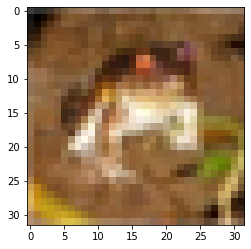

In [15]:
plt.imshow(x_train[0])

In [16]:
y_train[0],class_names

(array([6], dtype=uint8),
 ['0: airplane',
  '1: automobile',
  '2: bird',
  '3: cat',
  '4: deer',
  '5: dog',
  '6: frog',
  '7: horse',
  '8: ship',
  '9: truck'])

In [17]:
#6th is frog.

In [18]:
#building the CNN
#first we define the object.
model=tf.keras.models.Sequential()

In [19]:
#adding 1st convolution layers
#1)no. of filters or kernels = 32
#2)kernel size= 3
#3)padding=same
#4)activation function activation=ReLU
#5)input shape=(32,32,3)
#adding column or row of zeros is called padding.
#there are 2 types of padding:same and valid padding.
#in same padding we add column of zeros and then apply filter.
#image * filter = output
#after applying filter we can select max value here for each value of matrix
#in the output.
#now in valid padding we don't add a column of zeros here.
#we directly apply filter to get output.
#after applying filter we can select max values here.
#in valid padding we can lose some part of info.

In [20]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='ReLU',input_shape=[32,32,3]))

In [21]:
#after adding 1st CNN layer we need to add 2nd CNN layer and maxpool layer. 

In [22]:
#1)no. of filters or kernels = 32
#2)kernel size= 3
#3)padding=same
#4)activation function activation=ReLU
#for 2nd convolution layer we don't need input shape.
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='ReLU'))
#now we need to specify maxpool layer parameters.
#1)poolsize = 2
#2)strides=2
#3)padding=valid
#size of the square units on which we are going to select the maximum value is called
#pool size.
#by how many pixel units, filter/kernel is moving is called stride size.
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [23]:
#now adding 3rd CNN layer
#1)no. of filters or kernels = 64
#2)kernel size= 3
#3)padding=same
#4)activation function activation=ReLU
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='ReLU'))

In [24]:
#now we have to add one more CNN and maxpool layer
#1)no. of filters or kernels = 64
#2)kernel size= 3
#3)padding=same
#4)activation function activation=ReLU
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='ReLU'))
#now we need to specify maxpool layer parameters.
#1)poolsize = 2
#2)strides=2
#3)padding=valid
#size of the square units on which we are going to select the maximum value is called
#pool size.
#by how many pixel units, filter/kernel is moving is called stride size.
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

In [25]:
#above we added 4th CNN layer and maxpool layer.
#now adding the dropout layer
model.add(tf.keras.layers.Dropout(0,4))
#dropout is 40% here and dropout is a regilarization technique.

In [26]:
#adding the flattening layer.
model.add(tf.keras.layers.Flatten())
# by adding the flattening layer we are converting array to vector.

In [27]:
#now adding 1st dense layer.
model.add(tf.keras.layers.Dense(units=128,activation='ReLU'))

In [28]:
#adding 2nd dense layer and this is the output layer.
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
#we are specifying no. of units = 10 as 10 outputs are present in the output
#layer. As we have multiple outputs here so use softmax activation function.

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
#1st we added input layer then CNN layer then relu after that pooling layer
#again CNN, relu and pooling after that we added fully connected layers
#these are dense layers and output layer at the end.

In [30]:
#training the model.
#before training we have to compile the model i.e. the process to configure
#the learning process.
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['sparse_categorical_accuracy'])
#specified loss function which will guide to optimizer so that optimizer can
#move to the right direction and find the global minimum and at last we specified metrics.
#for binary output use metrics=accuracy
#for multiple output use metrics=['sparce_categorical_accuracy']

In [31]:
#training the model now
model.fit(x_train,y_train,batch_size=10,epochs=10)
#epochs is the no. of times the model is trained.

Epoch 1/10
5000/5000 [==============================] - 358s 71ms/step - loss: 1.3115 - sparse_categorical_accuracy: 0.5286
Epoch 2/10
5000/5000 [==============================] - 353s 71ms/step - loss: 0.8849 - sparse_categorical_accuracy: 0.6890
Epoch 3/10
5000/5000 [==============================] - 344s 69ms/step - loss: 0.7180 - sparse_categorical_accuracy: 0.7491
Epoch 4/10
5000/5000 [==============================] - 354s 71ms/step - loss: 0.6016 - sparse_categorical_accuracy: 0.7867
Epoch 5/10
5000/5000 [==============================] - 359s 72ms/step - loss: 0.4990 - sparse_categorical_accuracy: 0.8238
Epoch 6/10
5000/5000 [==============================] - 357s 71ms/step - loss: 0.4154 - sparse_categorical_accuracy: 0.8546
Epoch 7/10
5000/5000 [==============================] - 360s 72ms/step - loss: 0.3545 - sparse_categorical_accuracy: 0.8743
Epoch 8/10
5000/5000 [==============================] - 359s 72ms/step - loss: 0.2983 - sparse_categorical_accuracy: 0.8955
Epoch 9/

In [32]:
#model evaluation and prediction
test_loss,test_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 26s 81ms/step - loss: 1.3886 - sparse_categorical_accuracy: 0.7278


In [33]:
print('TEST ACCURACY IS: {}'.format(test_acc))

TEST ACCURACY IS: 0.7278000116348267


In [34]:
#to improve accuracy we can change epochs,dropout percentages and the 
#combination of all layers.

In [36]:
#predictions
#y_pred=model.predict_classes(x_test)
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 22s 70ms/step


In [37]:
#above we predicted values of x_test

In [38]:
print(y_pred[10],y_test[10])

4 [0]


In [39]:
print(y_pred[0],y_test[0])

3 [3]


In [40]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[761  12  66  21  19   7   7  12  67  28]
 [ 18 833   5   8   2   5   7   2  30  90]
 [ 60   6 642  51  97  45  59  23   9   8]
 [ 20   6  89 574  93 112  52  27  13  14]
 [ 17   4  91  49 729  20  33  46   7   4]
 [ 11   5  66 180  77 554  31  50  12  14]
 [  9   5  64  64  66  12 751   8  17   4]
 [ 12   3  37  58  86  37   0 745   3  19]
 [ 67  19  13  16   9   2   2   3 846  23]
 [ 32  53   7  14   5   6   5  12  23 843]]


In [41]:
#in confusion matrix the diagonal values are the right predicted values
#and other values are wrong predicted values.
#when we see from above these are predicted values

In [42]:
#when we see from left towards right these are actual values.
#now checking accuracy based on confusion matrix.
acc_cm=accuracy_score(y_test,y_pred)
print(acc_cm)

0.7278


In [43]:
#WE GOT ACCURACY SCORE OF 0.7278 FROM CONFUSION MATRIX.
#WE MADE PREDICTIONS AND ALSO EVALUATED THE MODEL ABOVE.